
# Deep Neural Networks

## Assignment
### Neural Network with :

- **Ionosphere**
- **binary-class**

In [29]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections.abc import Callable
from typing import Literal

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

%matplotlib inline

In [30]:
###----------------
### Some parameters
###----------------

inpDir = '../../input'
outDir = '../output'
subDir = 'Ionosphere'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 5001 # number of epochs
ALPHA = 0.001 # learning rate
NUM_SAMPLES = 1280 # How many samples we want to generate 
NOISE = 0.2 # Noise to be introduced in the data
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'coolwarm' # plt.cm.Spectral

plt.rcParams.update(params)

## Generate Data Set
Ionosphere Dataset

In [31]:
data_df = pd.read_csv('ionosphere.data', header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [32]:
data_df.shape

(351, 35)

In [33]:
data_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64

In [34]:
data_df = data_df.rename(columns={34: 'Classification'})
data_df.columns

Index([               0,                1,                2,                3,
                      4,                5,                6,                7,
                      8,                9,               10,               11,
                     12,               13,               14,               15,
                     16,               17,               18,               19,
                     20,               21,               22,               23,
                     24,               25,               26,               27,
                     28,               29,               30,               31,
                     32,               33, 'Classification'],
      dtype='object')

In [35]:
data_df.isna().sum()

0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
14                0
15                0
16                0
17                0
18                0
19                0
20                0
21                0
22                0
23                0
24                0
25                0
26                0
27                0
28                0
29                0
30                0
31                0
32                0
33                0
Classification    0
dtype: int64

In [36]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,Classification
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [37]:
data_df['Classification'].unique()

array(['g', 'b'], dtype=object)

In [38]:
labels = { 'g' : 'Good', 'b': 'Bad'}

In [39]:
features_df = data_df.drop('Classification', axis = 1) # drop label col

label_df = data_df['Classification'] # labels

features_df.shape, label_df.shape

((351, 34), (351,))

In [40]:
label_df = pd.get_dummies(label_df)
label_df

,b,g
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
...,...,...
346,False,True
347,False,True
348,False,True
349,False,True


In [41]:
#  Split the data in training and test sets to measure performance of the model.
X_train, X_test, y_train, y_test = train_test_split(features_df, label_df, 
                                                    stratify=label_df,
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE )

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(280, 34) (280, 2) (71, 34) (71, 2)


In [42]:
scaler = StandardScaler() # get the scaler

X_train = scaler.fit_transform(X_train) # train
X_test = scaler.transform(X_test) # test

y_train = y_train.to_numpy() # array
y_test = y_test.to_numpy() # convert to array

In [43]:
y_train

array([[False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ Tr

In [44]:
torch.version.cuda

'12.1'

In [45]:
#torch.cuda.current_device()

In [46]:
#torch.cuda.get_device_name(torch.cuda.current_device())

In [47]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [48]:
X_train.shape

(280, 34)

In [49]:
nn.BatchNorm1d?

Init signature:
nn.BatchNorm1d(
    num_features: int,
    eps: float = 1e-05,
    momentum: float = 0.1,
    affine: bool = True,
    track_running_stats: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies Batch Normalization over a 2D or 3D input as described in the paper
`Batch Normalization: Accelerating Deep Network Training by Reducing
Internal Covariate Shift <https://arxiv.org/abs/1502.03167>`__ .

.. math::

    y = \frac{x - \mathrm{E}[x]}{\sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta

The mean and standard-deviation are calculated per-dimension over
the mini-batches and :math:`\gamma` and :math:`\beta` are learnable parameter vectors
of size `C` (where `C` is the number of features or channels of the input). By default, the
elements of :math:`\gamma` are set to 1 and the elements of :math:`\beta` are set to 0.
At train time in the forward pass, the standard-deviation is calculated via the biased estimator,
equivalent to ``torch.var(input, u

In [50]:
class Model(nn.Module):

    def __init__ (self, input_dim):

        super (Model, self).__init__()

        self.layer1 = nn.Linear(input_dim, 34)
        
        self.bn1 = nn.BatchNorm1d(34) #added Batch Norm
        
        self.drop_out = nn.Dropout(0.05) #add drop out
        
        self.layer2 = nn.Linear(34, 16)
        
        self.layer3 = nn.Linear(16, 2)

    def forward(self, x):

        x = F.silu(self.bn1(self.layer1(x)) ) # layer 1

        x=self.drop_out(x)
        
        x = F.silu(self.bn1(self.layer2(x)) ) # layer 2

        x = F.softmax( self.layer3(x), dim = 1 ) # layer 3

        return x

In [51]:
model = Model(X_train.shape[1]).to(device)
print(model)

Model(
  (layer1): Linear(in_features=34, out_features=34, bias=True)
  (bn1): BatchNorm1d(34, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop_out): Dropout(p=0.05, inplace=False)
  (layer2): Linear(in_features=34, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=2, bias=True)
)


In [52]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1161, -0.0235,  0.1414,  ..., -0.0923, -0.0615, -0.0120],
         [ 0.0548, -0.0817,  0.1583,  ..., -0.0271,  0.0877,  0.1539],
         [ 0.1490, -0.0299, -0.1144,  ...,  0.0394,  0.0374,  0.1403],
         ...,
         [-0.1412, -0.0856, -0.1408,  ...,  0.0821,  0.1398, -0.0241],
         [ 0.1519, -0.0947,  0.0138,  ...,  0.1491, -0.0441,  0.0390],
         [-0.0665, -0.1623,  0.0631,  ...,  0.0459, -0.1004, -0.0976]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.1469, -0.1256, -0.1200,  0.1695,  0.0671, -0.0900,  0.1663,  0.1392,
          0.0704, -0.0434,  0.1702, -0.1033,  0.1480, -0.0013,  0.0226,  0.1597,
         -0.0910, -0.0775,  0.1619,  0.1353, -0.0287,  0.0877, -0.0469, -0.1117,
         -0.0740, -0.1656, -0.1066,  0.0123,  0.0861,  0.0887, -0.0025, -0.1615,
          0.0190,  0.0897], requires_grad=True),
 Parameter containing:
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       

In [53]:
print (f' Number of parameters {len(list(model.parameters()))}')

 Number of parameters 8


In [54]:
print (f' Layer 1 Weights {(list(model.parameters())[0].shape)}')
print (f' Layer 1 Bias    {(list(model.parameters())[1].shape)}')
print (f' Layer 2 Weights {(list(model.parameters())[2].shape)}')
print (f' Layer 2 Bias    {(list(model.parameters())[3].shape)}')

 Layer 1 Weights torch.Size([34, 34])
 Layer 1 Bias    torch.Size([34])
 Layer 2 Weights torch.Size([34])
 Layer 2 Bias    torch.Size([34])


In [55]:
train_X = Variable(torch.Tensor(X_train)).to(device)
train_y = Variable(torch.Tensor(y_train)).to(device)
test_X  = Variable(torch.Tensor(X_test)).to(device)
test_y  = Variable(torch.Tensor(y_test)).to(device)

In [56]:
loss_fn = nn.CrossEntropyLoss()

loss = []
tloss = []
n_epoch  = []
acc = []
tacc = []

optimizer = torch.optim.Adam(model.parameters(),
                             lr = ALPHA,
                             weight_decay=1e-5 # L2 regularization
                             ) # optimizer


# Iteration

for epoch in range (EPOCHS):

    model.train() # Set the mode
    
    predict_prob = model(train_X)
    
    curr_loss = loss_fn(predict_prob, train_y)

    ###----------
    ### Back prop
    ###----------
    optimizer.zero_grad()
    curr_loss.backward()
    optimizer.step()
    ###-----------------

    loss.append ( curr_loss.data.item() )
    
    _, y_pred = torch.max(predict_prob, 1)
    
    curr_acc = accuracy_score(y_train.argmax(axis = 1), y_pred.data.cpu())
    
    acc.append(curr_acc)
    
    model.eval()
    
    pred_prob_tst = model(test_X)
    
    tcurr_loss = loss_fn(pred_prob_tst, test_y)
    
    tloss.append(tcurr_loss.data.item())
    
    _, y_pred = torch.max(pred_prob_tst, 1)
    
    curr_acc_ts = accuracy_score(y_test.argmax(axis = 1), y_pred.data.cpu())
    
    tacc.append(curr_acc_ts)
    
    n_epoch.append(epoch)

    if epoch%100 == 0:
        print (f'epoch: {epoch} --- Loss {curr_loss.data.item():.3f}/{tcurr_loss.data.item():.3f}', end = '')
        print (f'--- Acc {curr_acc:.3f}/{curr_acc_ts:.3f}')

RuntimeError: running_mean should contain 16 elements not 34

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-2.3052e-02, -5.5942e-38, -5.8578e-02,  ...,  1.6199e-02,
           9.6483e-02, -7.0558e-02],
         [ 2.0990e-02,  5.0923e-38, -8.4636e-02,  ..., -1.7530e-01,
          -7.2439e-02,  6.5509e-02],
         [ 3.1568e-02,  4.6066e-38, -9.4870e-02,  ..., -1.3507e-01,
           5.6587e-02,  2.6846e-03],
         ...,
         [ 1.7531e-01,  2.3105e-38, -1.1650e-01,  ..., -8.4734e-02,
           8.1571e-02, -1.1723e-02],
         [-3.1549e-02,  8.2634e-39, -1.4914e-01,  ..., -2.9633e-02,
          -1.0387e-01,  2.0291e-01],
         [-9.0762e-02, -1.7267e-38, -1.1192e-01,  ...,  5.8974e-02,
           2.1393e-02,  2.0416e-02]], requires_grad=True),
 Parameter containing:
 tensor([ 9.3590e-07, -7.3155e-07, -2.9700e-07, -1.4588e-08, -1.0616e-07,
         -6.9076e-07, -9.8735e-07,  2.7609e-06,  2.0592e-07, -2.0769e-07,
         -1.7922e-07, -1.3302e-06, -1.4080e-07,  3.8404e-07, -2.1864e-06,
         -8.1425e-07, -3.1637e-08, -6.4407e-07,  8.7356e-07,  2.98

In [ ]:
loss_df = pd.DataFrame({'epoch': n_epoch, 
                        'loss': loss, 
                        'test loss': tloss,
                        'acc': acc, 
                        'test acc': tacc
                       })

In [ ]:
loss_df.head()

,epoch,loss,test loss,acc,test acc
0,0,0.677736,0.672557,0.657143,0.704225
1,1,0.671190,0.668145,0.646429,0.690141
2,2,0.665070,0.663530,0.660714,0.732394
3,3,0.658185,0.658713,0.685714,0.746479
4,4,0.653759,0.653680,0.700000,0.760563


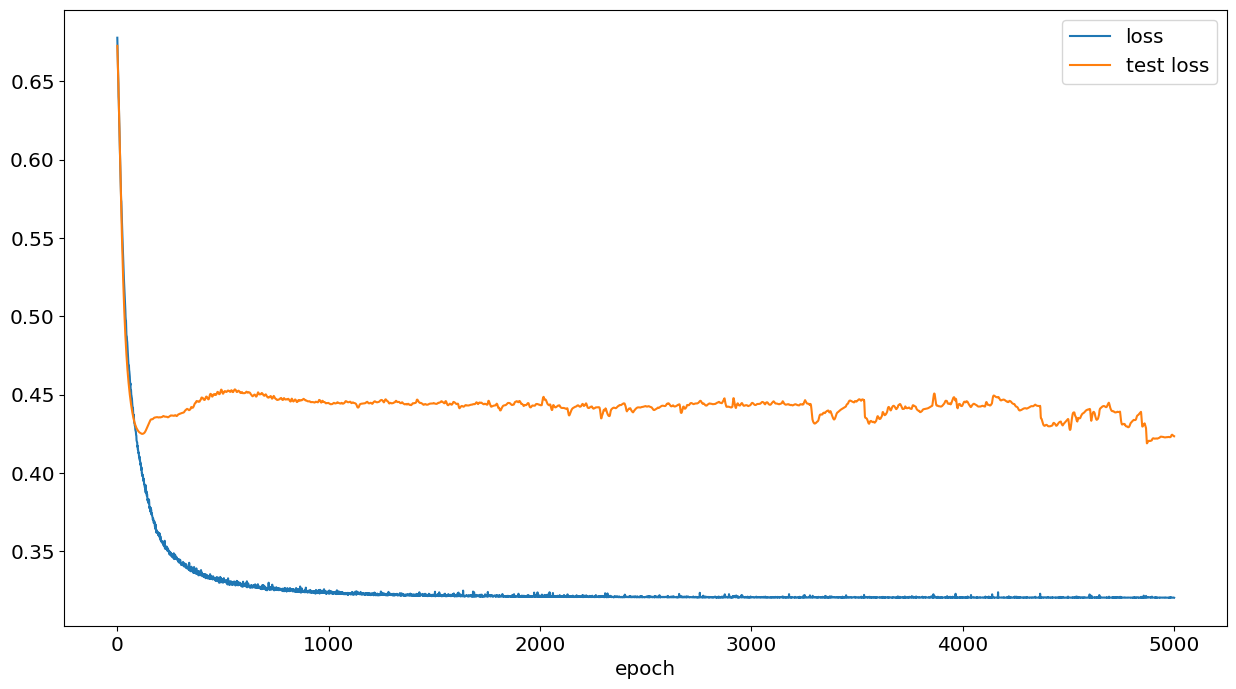

In [ ]:
loss_df.plot(x = 'epoch', y = ['loss', 'test loss']);

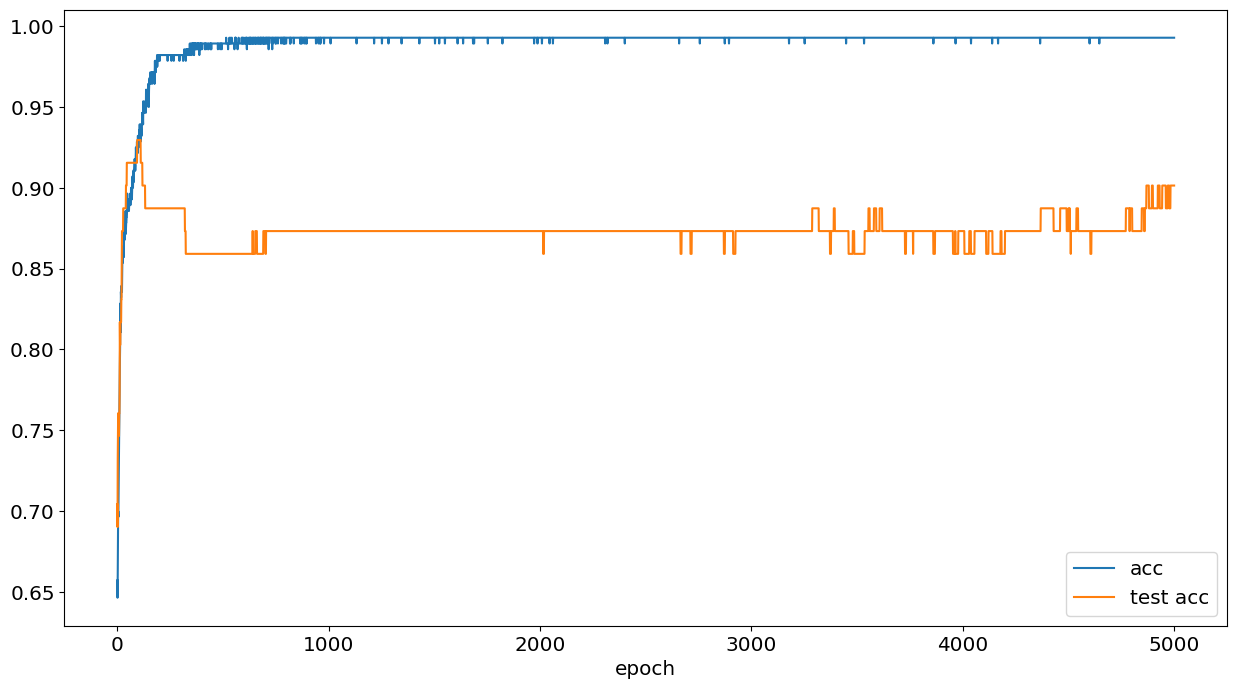

In [ ]:
loss_df.plot(x = 'epoch', y = ['acc', 'test acc']);

### Test Data

In [ ]:
pred_prob = model(test_X)
_, y_pred = torch.max(pred_prob, 1)
    
curr_acc_ts = accuracy_score(y_test.argmax(axis = 1), y_pred.data.cpu())

print(f'Accuracy score on Test Data : {curr_acc_ts: .4f}')

Accuracy score on Test Data :  0.9014


In [ ]:
print(classification_report(np.argmax(y_test, axis = 1), y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        25
           1       0.87      1.00      0.93        46

    accuracy                           0.90        71
   macro avg       0.93      0.86      0.88        71
weighted avg       0.91      0.90      0.90        71



In [ ]:
## Confusion Matrix helps

cm  = confusion_matrix(np.argmax(y_test, axis = 1), y_pred)
cm

array([[18,  7],
       [ 0, 46]])

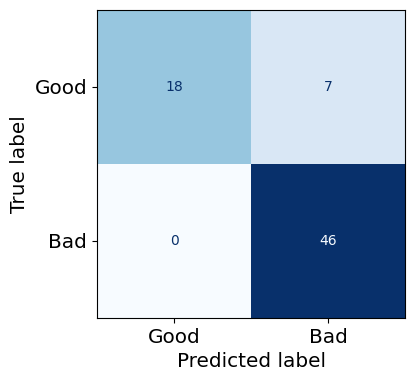

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels = labels.values())

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Blues', colorbar=False)

plt.show();